## ANALIZA PODATKOV - KNJIGE


Najprej je potrebno naložiti podatke z interneta. Ker smo podatke že naložili in obdelali lokalno, tega ne potrebujemo posebej zaganjati.

In [ ]:
import prevedi_in_shrani_podatke

# prevede in shrani podatke z interneta
prevedi_in_shrani_podatke.save_web_data()

In [ ]:
import obdelaj_podatke

# obdela shranjene podatke in jih zapise v csv datoteko
obdelaj_podatke.pripravi_podatke_za_csv()

# TABELA S PODATKI

Za prikaz vhodnih podatkov uporabimo knjižnico pandas.

In [74]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option('display.max_rows', 10)

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
KNJIGE = pd.read_csv('koncni_podatki/podatki_o_knjigi.csv', encoding='utf-8')

In [75]:
KNJIGE

,naslov,avtor,dolzina,zvrst,o_pisatelju
0,"Ne povej, kaj si sanjala - zvočna knjiga na US...",Feri Lainšček,131.0,roman,"Pisatelj, pesnik, dramatik in scenarist Feri L..."
1,Terenske raziskave ukrajinskega seksa,Oksana Zabužko,168.0,roman,Oksana Zabužko (1960) je ugledna ukrajinska fi...
2,Mitrejin koder,Miha Remec,204.0,roman,"Miha Remec (1922, Ptuj) je pisec znanstvene fa..."
3,Moje leto v Nikogaršnjem zalivu,Peter Handke,NaN,roman,Peter Handke (1942) je eden največjih živečih ...
4,Dežela ZOO,Dušan Čater,200.0,roman,"Du&scaron;an Čater (1968) je pisatelj, prevaja..."
...,...,...,...,...,...
329,Veronikin prt,Josip Osti,116.0,poezija,"Josip Osti (1945-;2021) je bil pesnik, pisatel..."
330,"Oče, tvoje oči gorijo",Ivo Svetina,116.0,poezija,"Ivo Svetina (1948, Ljubljana) je eden pomembne..."
331,Pod kamni plešem,Jure Vuga,77.0,poezija,"Jure Vuga (1983, Koper) je profesor umetnostne..."
332,Fusnote,Andrej Brvar,132.0,poezija,"Andrej Brvar (1945) je slovenski lektor, uredn..."


# PROUČEVANJE PODATKOV

Najprej bomo uvozili knjižnico za risanje grafov.

In [12]:
import matplotlib.pyplot as plt

Poglejmo si, kateri avtor ima v prodaji največ knjig.

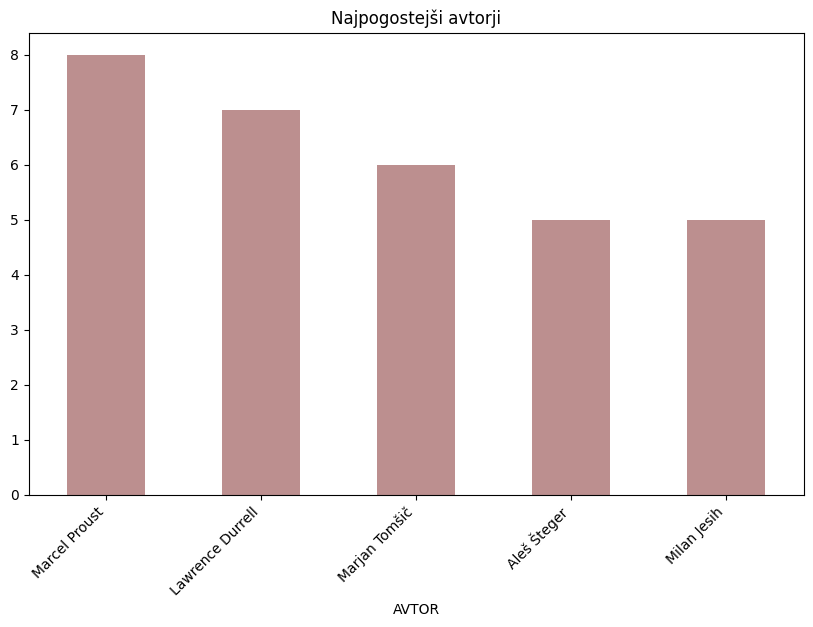

In [18]:
# izberemo 5 najpogostejših avtorjev
najpogosteje = KNJIGE['avtor'].value_counts().nlargest(5)

# narisemo histogram
plt.figure(figsize=(10, 6))
najpogosteje.plot(kind='bar', color='rosybrown')
plt.title('Najpogostejši avtorji')
plt.xlabel('AVTOR')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

Poglejmo si, kakšna je povprečna dolžina knjige glede na zvrst. Rezultat prikažemo s tortnim diagramom.

            dolzina
zvrst              
poezija  239.807143
roman    427.220430


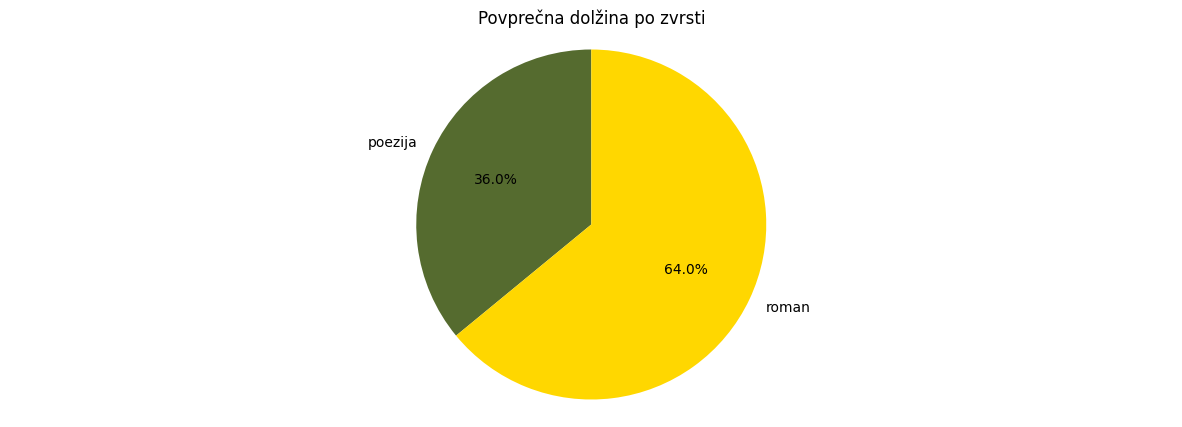

In [49]:
povprecna_dolzina_po_zvrsti = KNJIGE[['dolzina', 'zvrst']].groupby(by = 'zvrst').mean()
print(povprecna_dolzina_po_zvrsti)

fig, (ax1) = plt.subplots(1, figsize=(15, 5))

# Narisemo tortni diagram za dolžino
povprecna_dolzina_po_zvrsti['dolzina'].plot.pie(
    autopct='%1.1f%%', startangle=90, ax=ax1, colors = ['darkolivegreen', 'gold'])
ax1.set_title('Povprečna dolžina po zvrsti')
ax1.axis('equal')  # To zagotovi, da je tortni diagram krožen
ax1.set_ylabel('')  # Odstrani y-etiketo

plt.show()

Poglejmo si še, katera beseda se največkrat uporabi v naslovu.

[(13, 'pesmi'), (9, 'zbrane'), (4, 'brez'), (4, 'knjiga'), (4, 'poezije'), (3, 'antologija'), (3, 'lune'), (3, 'polne')]


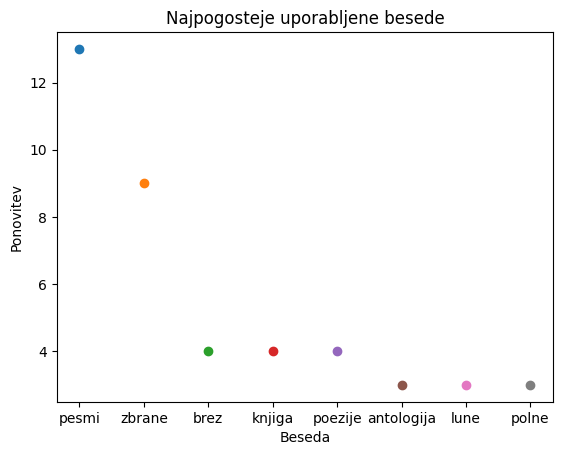

In [109]:
import re

slov = {}
for index, row in KNJIGE.iterrows():    
    # izbrisemo locila iz opisa
    naslov = re.sub(r'[?.!-]+', '', row["naslov"])

    for beseda in naslov.split(" "):
        beseda = beseda.lower()
        if len(beseda) <= 3:
            continue

        if beseda in slov:
            slov[beseda] += 1
        else:
            slov[beseda] = 1

ponovitve = [(-n, beseda) for beseda, n in slov.items()]
ponovitve.sort()

rezultat = [(-ponovitev, b) for ponovitev, b in ponovitve[:8]]
print(rezultat)

for pon, bes in rezultat:
    plt.scatter(bes, pon)
    # Dodajanje naslova in oznak osi
    plt.title("Najpogosteje uporabljene besede")
    plt.xlabel("Beseda")
    plt.ylabel("Ponovitev")
    
plt.show()


Ugotovimo, da se največkrat pojavi beseda 'pesmi'.

Še ena zanimiva stvar bi bila leto rojstva pisateljev. Poglejmo si.

[(10, '1973'), (9, '1871'), (9, '1939'), (9, '1963'), (9, '1967'), (8, '1954'), (7, '1912'), (7, '1945')]


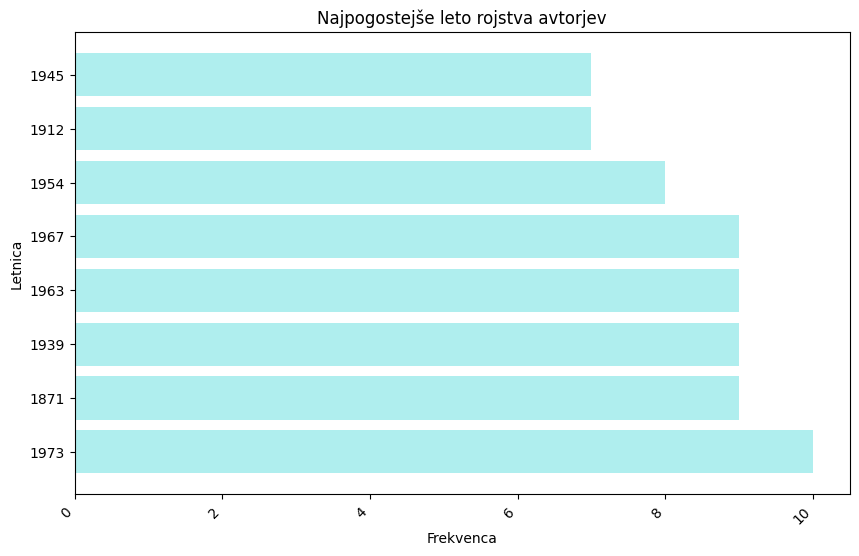

In [130]:
import re

slov = {}
for index, row in KNJIGE.iterrows():
    letnica_vzorec = r'\((\d{4})[^\)]*\)'
    opis = row["o_pisatelju"]
    if isinstance(opis, str): 
        letnica = re.search(letnica_vzorec, opis)
        
        if letnica:
            let = letnica.group(1) 
            if let in slov:
                slov[let] += 1
            else:
                slov[let] = 1

ponovitve = [(-n, letnica) for letnica, n in slov.items()]
ponovitve.sort()

rezultat = [(abs(ponovitev), letnica) for ponovitev, letnica in ponovitve[:8]]
print(rezultat)

letnice, frekvence = zip(*rezultat)

plt.figure(figsize=(10, 6))
plt.barh(frekvence, letnice, color='paleturquoise')  # Uporabi barh za horizontalni graf
plt.title('Najpogostejše leto rojstva avtorjev')
plt.xlabel('Frekvenca')
plt.ylabel('Letnica')
plt.xticks(rotation=45, ha='right')  # Rotiraj oznake na osi X
plt.show()
